Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Label distribution in training set:
 0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64


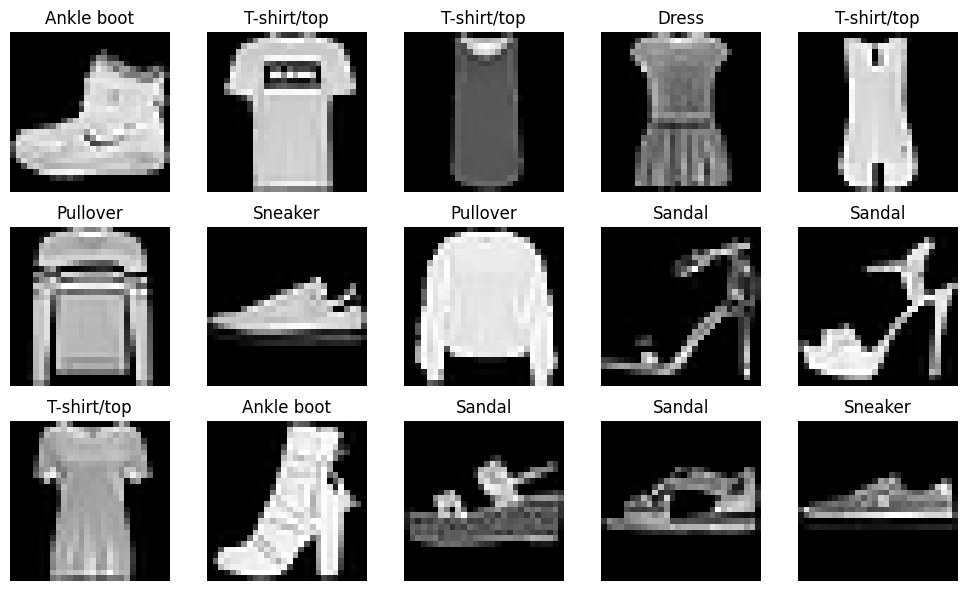

Training images - mean: 72.94035223214286 , std: 90.02118235130519
Test images - mean: 73.14656658163265 , std: 89.87325907809718
Missing values in training images: 0
Missing values in training labels: 0
Missing values in test images: 0
Missing values in test labels: 0


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
try:
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
except Exception as e:
    print("Error loading the Fashion MNIST dataset:", str(e))
    train_images, train_labels, test_images, test_labels = None, None, None, None

if train_images is not None and test_images is not None:
    # 1. Shape of the dataset
    train_images_shape = train_images.shape
    train_labels_shape = train_labels.shape
    test_images_shape = test_images.shape
    test_labels_shape = test_labels.shape

    print("Train images shape:", train_images_shape)
    print("Train labels shape:", train_labels_shape)
    print("Test images shape:", test_images_shape)
    print("Test labels shape:", test_labels_shape)

    # 2. Unique labels in the dataset
    unique_labels = np.unique(train_labels)
    print("Unique labels:", unique_labels)

    # 3. Distribution of labels in the training set
    label_counts = pd.Series(train_labels).value_counts().sort_index()
    print("Label distribution in training set:\n", label_counts)

    # 4. Display some sample images
    def plot_sample_images(images, labels, class_names, num_rows=3, num_cols=5):
        plt.figure(figsize=(10, 6))
        for i in range(num_rows * num_cols):
            plt.subplot(num_rows, num_cols, i + 1)
            plt.imshow(images[i], cmap='gray')
            plt.title(class_names[labels[i]])
            plt.axis('off')
        plt.tight_layout()
        plt.show()

    # Class names for Fashion MNIST
    class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

    # Plot some sample images
    plot_sample_images(train_images, train_labels, class_names)

    # 5. Basic statistics of the image data
    train_images_mean = np.mean(train_images)
    train_images_std = np.std(train_images)
    test_images_mean = np.mean(test_images)
    test_images_std = np.std(test_images)

    print("Training images - mean:", train_images_mean, ", std:", train_images_std)
    print("Test images - mean:", test_images_mean, ", std:", test_images_std)

    # 6. Check for missing values
    missing_train_images = np.sum(np.isnan(train_images))
    missing_train_labels = np.sum(np.isnan(train_labels))
    missing_test_images = np.sum(np.isnan(test_images))
    missing_test_labels = np.sum(np.isnan(test_labels))

    print("Missing values in training images:", missing_train_images)
    print("Missing values in training labels:", missing_train_labels)
    print("Missing values in test images:", missing_test_images)
    print("Missing values in test labels:", missing_test_labels)
else:
    print("Failed to load the Fashion MNIST dataset.")


# 2.

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5129 - accuracy: 0.8178 - val_loss: 0.4108 - val_accuracy: 0.8468
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3818 - accuracy: 0.8604 - val_loss: 0.3737 - val_accuracy: 0.8670
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3408 - accuracy: 0.8741 - val_loss: 0.3574 - val_accuracy: 0.8712
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3170 - accuracy: 0.8825 - val_loss: 0.3350 - val_accuracy: 0.8787
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2966 - accuracy: 0.8890 - val_loss: 0.3374 - val_accuracy: 0.8792
Epoch 6/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.2872 - accuracy: 0.8926 - val_loss: 0.3482 - val_accuracy: 0.8773
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2715 - accuracy: 0.8984 - val_loss: 0.3381 - val_accurac

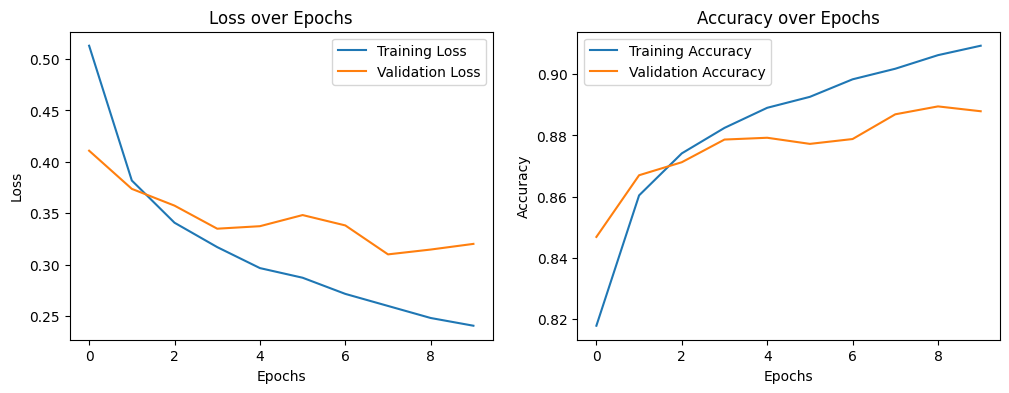

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load the Fashion MNIST dataset
try:
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
except Exception as e:
    print("Error loading the Fashion MNIST dataset:", str(e))
    train_images, train_labels, test_images, test_labels = None, None, None, None

if train_images is not None and test_images is not None:
    # Normalize the image data
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    # One-hot encode the labels
    train_labels = to_categorical(train_labels, num_classes=10)
    test_labels = to_categorical(test_labels, num_classes=10)

    # Build the model
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels,
                        epochs=10,
                        batch_size=32,
                        validation_split=0.2)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print(f"Test accuracy: {test_accuracy}")

    # Plot the training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over Epochs')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')

    plt.show()
else:
    print("Failed to load the Fashion MNIST dataset.")


313/313 [==============================] - 1s 4ms/step - loss: 0.3454 - accuracy: 0.8794
Test accuracy: 0.8794000148773193
313/313 [==============================] - 2s 5ms/step


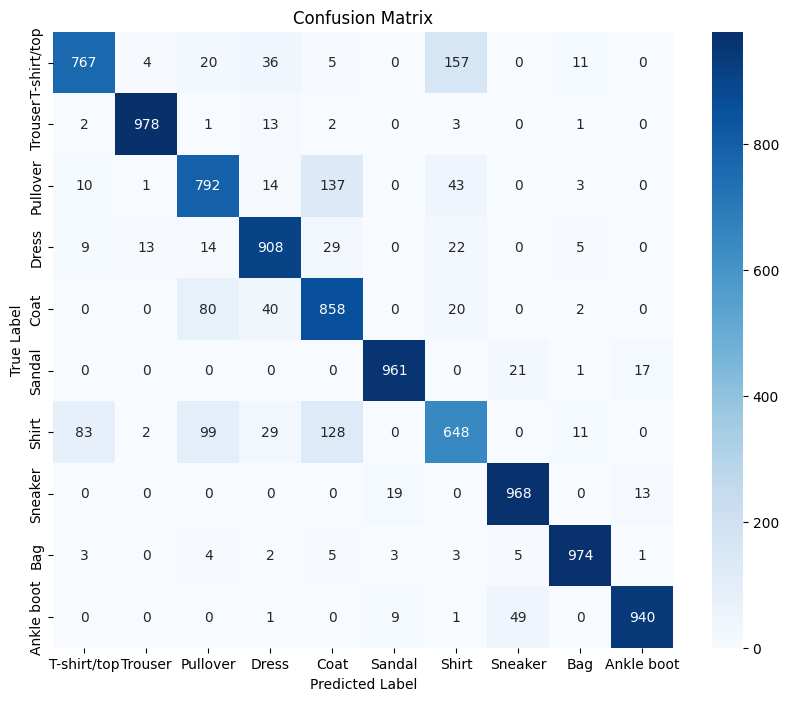

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.77      0.82      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.78      0.79      0.79      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.74      0.86      0.79      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.72      0.65      0.68      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



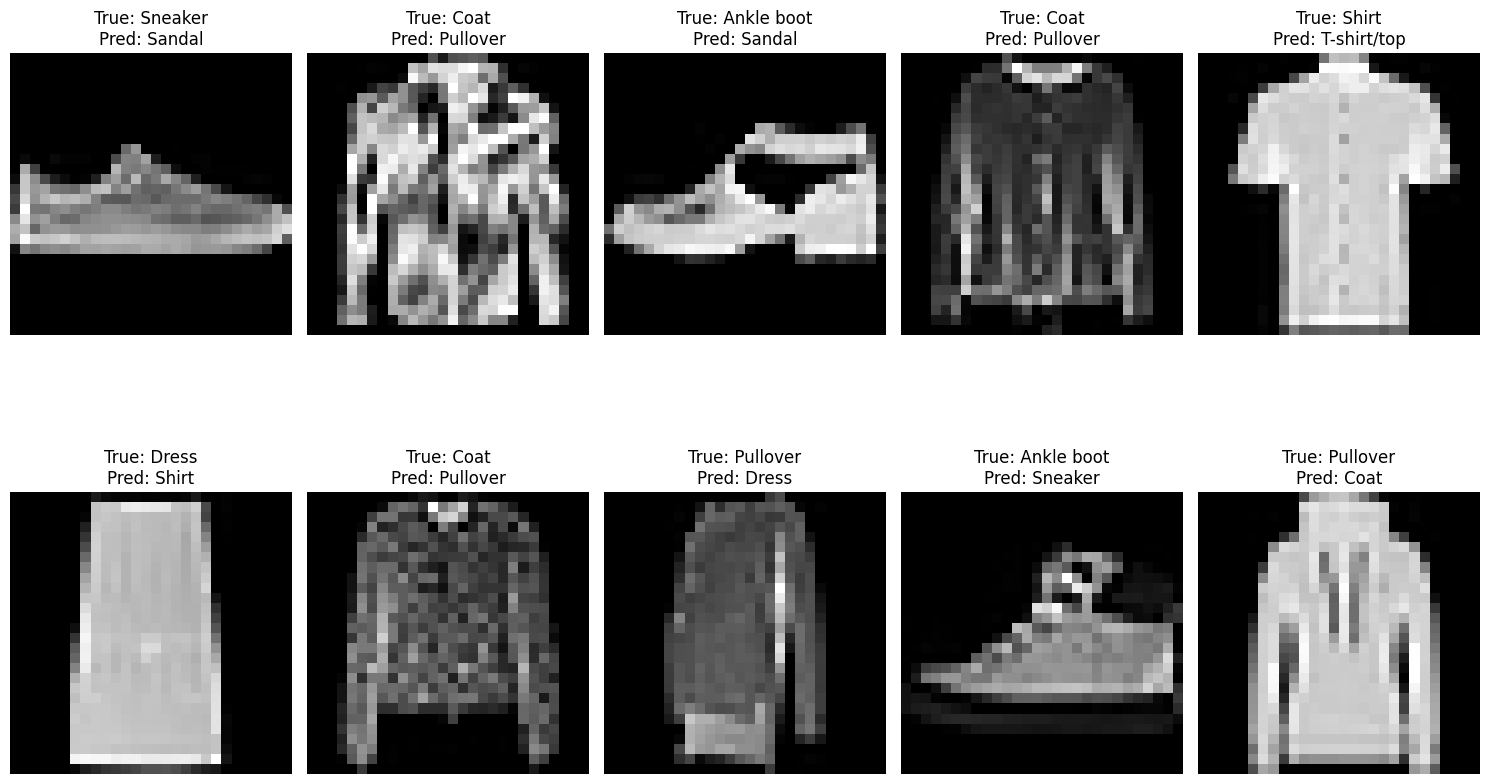

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")

# Evaluate the model to get predictions
test_predictions = model.predict(test_images)
test_pred_labels = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, test_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(true_labels, test_pred_labels, target_names=class_names)
print(class_report)

# Find some examples of incorrect classifications
incorrect_indices = np.where(test_pred_labels != true_labels)[0]

# Display some incorrect classifications
def plot_incorrect_classifications(images, true_labels, pred_labels, class_names, indices, num_images=10):
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(indices[:num_images]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"True: {class_names[true_labels[idx]]}\nPred: {class_names[pred_labels[idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot some incorrect classifications
plot_incorrect_classifications(test_images, true_labels, test_pred_labels, class_names, incorrect_indices)
